<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Lyrics_Classification_TFID_(Dataset5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [125]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID


In [126]:
dataset = pd.read_csv('Lyrical_data_5.csv',encoding='cp1252')

In [127]:
dataset.head()

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love


In [128]:
lyrics = dataset['Chorus']
lyrics

0      Diana,\rLet me be the one to light a fire insi...
1      Don't forget where you belong\rHome\rDon't for...
2      I'm sorry if I say, "I need you"\nBut I don't ...
3      I don't care what people say when we're togeth...
4      Better than words\rMore than a feeling Crazy i...
                             ...                        
795    You've got every right\r\nTo a beautiful life\...
796    I'm only one call away\r\nI'll be there to sav...
797    It started with a kiss on your mama's couch\r\...
798    I warned myself that I shouldn't play with fir...
799    I'll admit, I was wrong, what else can I say, ...
Name: Chorus, Length: 800, dtype: object

In [129]:
dataset.dropna(how='all', axis=1, inplace=True)

Checking the empty rows in dataset

In [71]:
print (dataset.isnull().sum())

Song_ID       0
Song_Title    0
Chorus        0
Emotion       0
dtype: int64


In [130]:
modifiedDF = dataset.dropna()

In [131]:
modifiedDF['Chorus'].apply(lambda x: len(x.split(' '))).sum()
#We have 42,081 words in data

42081

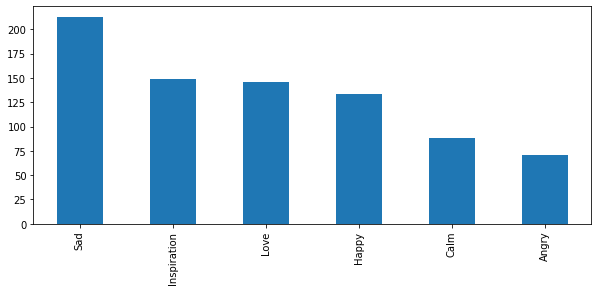

In [132]:
my_emotions = ['Happy','Sad','Calm','Inspiration','Angry','Love']
plt.figure(figsize=(10,4))
modifiedDF.Emotion.value_counts().plot(kind='bar');

In [133]:
from numpy import random
import gensim
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

modifiedDF = modifiedDF.reset_index(drop=True)
REPLACE = re.compile('[^a-zA-Z]')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE.sub(' ', text)
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
modifiedDF['Chorus'] = modifiedDF['Chorus'].apply(clean_text)
# X = modifiedDF['Chorus']
# y = modifiedDF['Emotion']

In [135]:
def pad_str(s):
        return ' '+s+' '
        
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

In [136]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation
corpus = []
for i in range(0, 799):
  Lyrics = re.sub('[^a-zA-Z]', ' ', modifiedDF['Chorus'][i])
  # Lyrics = re.sub("\\r", " ", modifiedDF['Chorus'][i])
  # Lyrics = re.sub("\,", " ", Lyrics)
  # Lyrics = re.sub("\'s", " ", Lyrics) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
  # Lyrics = re.sub(" whats ", " what is ", Lyrics, flags=re.IGNORECASE)
  # Lyrics = re.sub("\'ve", " have ", Lyrics)
  # Lyrics = re.sub("can't", "can not", Lyrics)
  # Lyrics = re.sub("n't", " not ", Lyrics)
  # Lyrics = re.sub("i'm", "i am", Lyrics, flags=re.IGNORECASE)
  # Lyrics = re.sub("\'re", " are ", Lyrics)
  # Lyrics = re.sub("\'d", " would ", Lyrics)
  # Lyrics = re.sub("\'ll", " will ", Lyrics)
  # Lyrics = re.sub("e\.g\.", " eg ", Lyrics, flags=re.IGNORECASE)
  # Lyrics = re.sub("b\.g\.", " bg ", Lyrics, flags=re.IGNORECASE)
  # Lyrics = re.sub("(\d+)(kK)", " \g<1>000 ", Lyrics)
  # Lyrics = re.sub('\$', " dollar ", Lyrics)
  # Lyrics = re.sub('\%', " percent ", Lyrics)
  # Lyrics = re.sub('\&', " and ", Lyrics)
  # Lyrics = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), Lyrics)
  Lyrics = Lyrics.lower()
  Lyrics = Lyrics.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('down')
  all_stopwords.remove("y")
  all_stopwords.remove("i")
  all_stopwords.remove('over')
  all_stopwords.remove('under')
  all_stopwords.remove('no')
  all_stopwords.remove('only')
  all_stopwords.remove("don't")
  all_stopwords.remove("aren't")
  all_stopwords.remove("o")
  all_stopwords.remove("ma")
  all_stopwords.remove("didn't")
  all_stopwords.remove("can")
  all_stopwords.remove("be")
  all_stopwords.remove("to")
  all_stopwords.remove("for")
  all_stopwords.remove("you")
  all_stopwords.remove("your")
  all_stopwords.remove("we")
  all_stopwords.remove("our")
  all_stopwords.remove("my")
  all_stopwords.remove("you're")
  Lyrics = [ps.stem(word) for word in Lyrics if not word in set(all_stopwords)]
  Lyrics = ' '.join(Lyrics)
  #Lyrics = [c for c in Lyrics if c not in punctuation]
  #Lyrics = ' '.join(Lyrics)
  corpus.append(Lyrics)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creating the bag of words modal

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 475)
X = cv.fit_transform(corpus).toarray()
y = modifiedDF.iloc[0:799, -1].values

Splitting the dataset into the Training set and Test set

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

Naive Bayes classifier for multinomial models

In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [140]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.55625
              precision    recall  f1-score   support

       Happy       0.75      0.23      0.35        13
         Sad       0.80      0.27      0.40        15
        Calm       0.53      0.42      0.47        19
 Inspiration       0.52      0.53      0.52        32
       Angry       0.59      0.43      0.50        30
        Love       0.54      0.86      0.67        51

    accuracy                           0.56       160
   macro avg       0.62      0.46      0.49       160
weighted avg       0.59      0.56      0.53       160

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 12.1 ms


Linear support vector machine

In [141]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=10, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=10,
                               tol=None))])

In [142]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.5125
              precision    recall  f1-score   support

       Happy       0.82      0.69      0.75        13
         Sad       0.55      0.40      0.46        15
        Calm       0.31      0.53      0.39        19
 Inspiration       0.50      0.50      0.50        32
       Angry       0.45      0.43      0.44        30
        Love       0.62      0.55      0.58        51

    accuracy                           0.51       160
   macro avg       0.54      0.52      0.52       160
weighted avg       0.54      0.51      0.52       160

CPU times: user 10.8 ms, sys: 1.94 ms, total: 12.8 ms
Wall time: 12.6 ms


Logistic regression

In [143]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=2, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=2))])

In [144]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.5125
              precision    recall  f1-score   support

       Happy       0.47      0.69      0.56        13
         Sad       0.50      0.40      0.44        15
        Calm       0.38      0.47      0.42        19
 Inspiration       0.51      0.56      0.54        32
       Angry       0.42      0.33      0.37        30
        Love       0.65      0.59      0.62        51

    accuracy                           0.51       160
   macro avg       0.49      0.51      0.49       160
weighted avg       0.52      0.51      0.51       160

CPU times: user 11.8 ms, sys: 2.13 ms, total: 14 ms
Wall time: 13.8 ms


Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline([
                ('tfidf', TfidfTransformer()),
                ('rfc', RandomForestClassifier(n_estimators=200, criterion='entropy'))])
rfc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('rfc',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=200))])

In [147]:
%%time

y_predRF = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_predRF, y_test))
print(classification_report(y_test, y_predRF,target_names=my_emotions))

accuracy 0.525
              precision    recall  f1-score   support

       Happy       0.67      0.46      0.55        13
         Sad       0.30      0.40      0.34        15
        Calm       0.50      0.47      0.49        19
 Inspiration       0.46      0.38      0.41        32
       Angry       0.64      0.70      0.67        30
        Love       0.56      0.59      0.57        51

    accuracy                           0.53       160
   macro avg       0.52      0.50      0.50       160
weighted avg       0.53      0.53      0.52       160

CPU times: user 39.9 ms, sys: 0 ns, total: 39.9 ms
Wall time: 42.8 ms


BOW with keras

In [87]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [88]:
train_size = int(len(modifiedDF) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(modifiedDF) - train_size))

Train size: 560
Test size: 240


In [89]:
train_posts = modifiedDF['Chorus'][:train_size]
train_tags = modifiedDF['Emotion'][:train_size]

test_posts = modifiedDF['Chorus'][train_size:]
test_tags = modifiedDF['Emotion'][train_size:]

In [90]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [91]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [92]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [93]:
from tensorflow.keras.utils import to_categorical

In [94]:
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [95]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (560, 1000)
x_test shape: (240, 1000)
y_train shape: (560, 6)
y_test shape: (240, 6)


In [120]:
# batch_size = 50
# epochs = 100 # Accuracy - 46.25

# batch_size = 50
# epochs = 50 #Accuracy - 43.75 (validation split - 0.2)

# batch_size = 50
# epochs = 10 #45.83

# batch_size = 50
# epochs = 2 # 34.58

batch_size = 64
epochs = 30 # 47.91

# batch_size = 100
# epochs = 20 # 46.66

# batch_size = 50
# epochs = 500 # 44.99

In [121]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 0s 28ms/step - loss: 1.7512 - accuracy: 0.2388 - val_loss: 1.7414 - val_accuracy: 0.2143
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 1.5120 - accuracy: 0.5000 - val_loss: 1.7238 - val_accuracy: 0.2589
Epoch 3/30
7/7 [==============================] - 0s 10ms/step - loss: 1.3321 - accuracy: 0.6272 - val_loss: 1.7059 - val_accuracy: 0.3036
Epoch 4/30
7/7 [==============================] - 0s 9ms/step - loss: 1.1497 - accuracy: 0.7143 - val_loss: 1.6710 - val_accuracy: 0.3661
Epoch 5/30
7/7 [==============================] - 0s 9ms/step - loss: 0.9835 - accuracy: 0.8237 - val_loss: 1.6250 - val_accuracy: 0.3750
Epoch 6/30
7/7 [==============================] - 0s 9ms/step - loss: 0.8450 - accuracy: 0.8817 - val_loss: 1.5859 - val_accuracy: 0.3929
Epoch 7/30
7/7 [==============================] - 0s 9ms/step - loss: 0.7093 - accuracy: 0.9286 - val_loss: 1.5533 - val_accuracy: 0.3750
Epoch 8/30
7/7 [================

In [123]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 1.7112 - accuracy: 0.4250
Test accuracy: 0.42500001192092896
